In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import lmfit
import corner

In [25]:
def Hz1(z1,H01,Om1,w0,w1):
    #Ode1=1.-Om
   #the redshift dependence of the dark energy density using Jassal parametrization w(z)=w_0 + w_1{z \over {(1+z)}^2}:
    I=((1+z1)**(3*(1+w0)))*np.exp((3*w1*z1**2)/(2*(1+z1)**2))
    E = np.sqrt((Om1*(1+z1)**3.) + (1-Om1)*I)
    HZ1 = H01*E
    return HZ1

In [26]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01, 3., num=num_zs)

In [43]:
O_m=0.28
w_0=-0.96
w_1=-1.5
H_0=66.
#O_de=1.-O_m

In [44]:
#Hubble comoving parameter
Hz=Hz1(zs,H_0,O_m,w_0,w_1)/(1+zs)

In [45]:
#random error for Hz
error_sigma = 0.5
e1 = np.random.normal(0., error_sigma, Hz.shape)

In [46]:
H_zz= Hz + e1

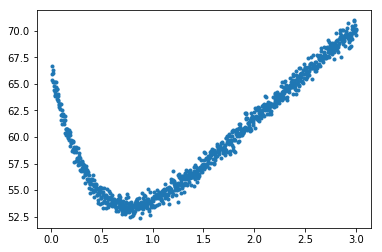

In [47]:
plt.plot(zs,H_zz, '.')

In [48]:
p = lmfit.Parameters()
p.add_many(('Om1',0.3,True,0.,2.),
           ('H01',70.,True,50.,100.),
           ('w0',-1.,True,-3.,3.),
           ('w1',0.1,True,-2.,2.))

def residual(p):
    v = p.valuesdict()
    return (Hz1(zs,v['H01'],v['Om1'],v['w0'],v['w1'])/(1+zs)-H_zz)/error_sigma

In [49]:
mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 1000
    # variables        = 4
    chi-square         = 1000.18707
    reduced chi-square = 1.00420389
    Akaike info crit   = 8.18705720
    Bayesian info crit = 27.8180783
[[Variables]]
    Om1:  0.27853832 +/- 0.00129406 (0.46%) (init = 0.3)
    H01:  66.1614960 +/- 0.13944292 (0.21%) (init = 70)
    w0:  -0.98367585 +/- 0.02047031 (2.08%) (init = -1)
    w1:  -1.37948320 +/- 0.11638681 (8.44%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(w0, w1)   = -0.973
    C(Om1, H01) = -0.970
    C(Om1, w0)  =  0.905
    C(H01, w0)  = -0.880
    C(Om1, w1)  = -0.861
    C(H01, w1)  =  0.789


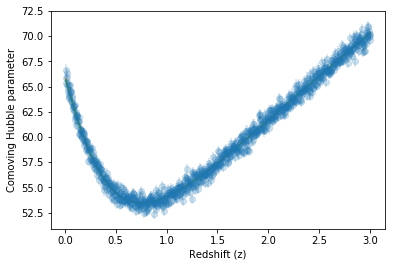

In [50]:
plt.errorbar(zs,H_zz,yerr=error_sigma,fmt='o',alpha=0.2)
#bestOde1= mi.params.valuesdict()['Ode1']
bestOm1 = mi.params.valuesdict()['Om1']
bestH01 = mi.params.valuesdict()['H01']
bestw0 = mi.params.valuesdict()['w0']
bestw1 = mi.params.valuesdict()['w1']
plt.plot(zs,Hz1(zs,bestH01,bestOm1,bestw0,bestw1)/(1+zs))
plt.plot(zs,Hz)
plt.xlabel('Redshift (z)')
plt.ylabel('Comoving Hubble parameter')
lmfit.report_fit(mi)

In [23]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500, thin=1,
                         params=p, is_weighted=True)

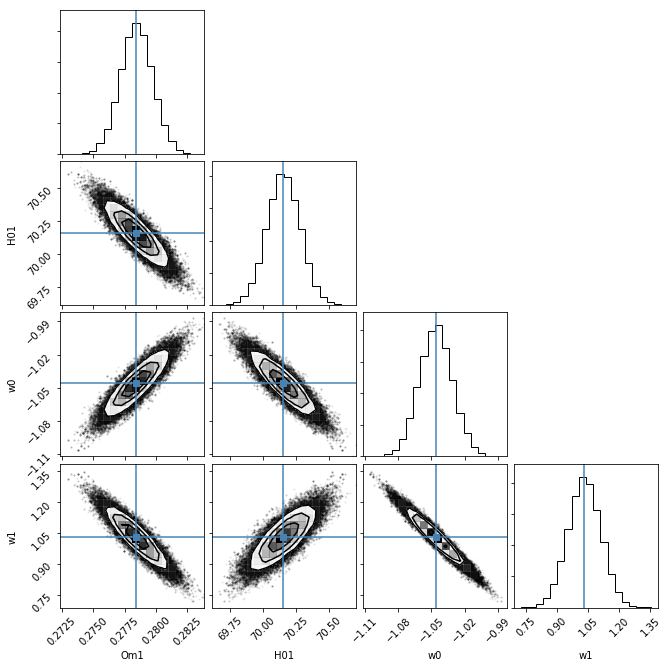

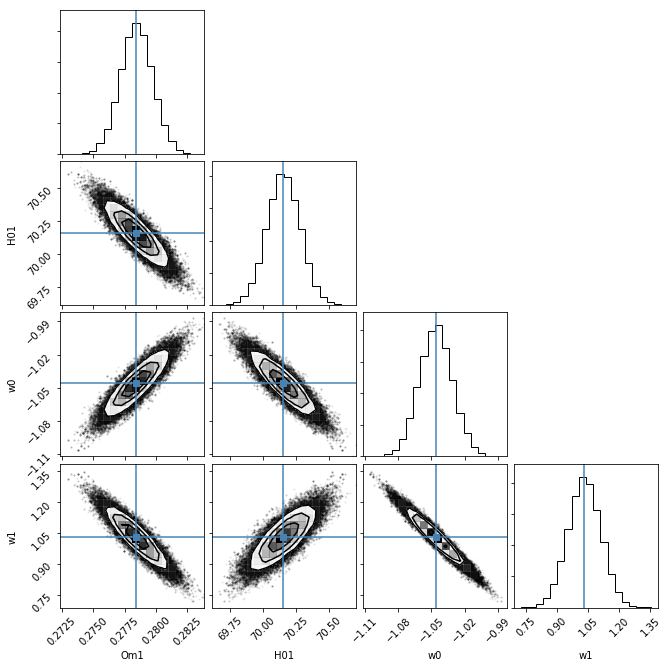

In [13]:
corner.corner(res.flatchain,labels=res.var_names, truths=list(res.params.valuesdict().values()))